# Unsupervised Learning Final Assignment DS3

#### Author : M.S. Hossain, Master student Data Science for Life Sciences.
#### University : Hanze University of Applied Sciences, Gorningen, Netherlands
#### Student number: 436908
#### Course Teacher : Fenna Feenstra, Hanze University of Applied Sciences

#### Background information
This dataset contains coordinates from markers of skull features from different species of primates. Utilizing unsupervised learning techniques, I tried to find which technique is best for clustering according to species

#### Loading essential Libraries

In [66]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN,MeanShift,AgglomerativeClustering,estimate_bandwidth 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import metrics
from itertools import cycle
import plotly.graph_objs as go
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

### Data Preparation, Exploration and Analysis

In [67]:
df = pd.read_csv('primates_morphology.csv')

In [68]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,37773,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,37772,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,22276,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,37776,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,37777,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A


In [69]:
df.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
160,41421,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,...,0.360452,0.513323,0.043604,0.294724,-0.003514,Hl,Hylobates,lar,F,A
161,41416,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,...,-0.368755,-0.173323,-0.627292,0.092090,0.444992,Hl,Hylobates,lar,F,A
162,41414,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,...,-0.033229,0.434486,-0.158110,-0.416191,0.160474,Hl,Hylobates,lar,F,A
163,41412,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,...,0.125275,-0.018511,0.080169,-0.235063,0.317110,Hl,Hylobates,lar,F,A
164,41411,-88.663448,-43.835382,74.681197,19.086880,9.755993,-9.499983,2.948722,-2.992005,-0.666312,...,0.141954,-0.947492,0.060862,-0.297479,0.723835,Hl,Hylobates,lar,F,A


In [70]:
## dropping Unnamed:0 column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A


In [71]:
profile = ProfileReport(df, minimal=True)
profile.to_file("df4.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 334.13it/s]


In [72]:
print("Shape before checking and removing any missing value:", df.shape)

Shape before checking and removing any missing value: (165, 35)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   0             165 non-null    float64
 1   1             165 non-null    float64
 2   2             165 non-null    float64
 3   3             165 non-null    float64
 4   4             165 non-null    float64
 5   5             165 non-null    float64
 6   6             165 non-null    float64
 7   7             165 non-null    float64
 8   8             165 non-null    float64
 9   9             165 non-null    float64
 10  10            165 non-null    float64
 11  11            165 non-null    float64
 12  12            165 non-null    float64
 13  13            165 non-null    float64
 14  14            165 non-null    float64
 15  15            165 non-null    float64
 16  16            165 non-null    float64
 17  17            165 non-null    float64
 18  18            165 non-null    

In this dataset there are 34 columns, where 0 to 29 are numeric and remaing columns (Abbreviation, Genus, Species, Sex and Age) are object which seems to be labels.

In [74]:
print('There are {:.1f} missing values in this dataframe'.format(df.isna().sum().sum()))

There are 0.0 missing values in this dataframe


As there is no missing value, so no action has to be taken.

In [75]:
# Display a description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,165.0,5.537129,99.061556,-201.591249,-58.767559,-4.994670,89.480991,192.170450
1,165.0,1.196007,69.971050,-111.659165,-44.542377,18.343281,42.633134,433.444316
2,165.0,-0.125596,56.627559,-114.986835,-45.981261,-2.090244,32.805157,142.161119
3,165.0,0.774423,18.591984,-54.636918,-12.328664,4.082730,16.969797,33.486208
4,165.0,-0.161111,11.336600,-19.375303,-7.348686,-2.158090,3.716401,68.005131
5,165.0,-0.182550,8.710069,-24.431319,-5.823589,-1.071286,5.078963,21.570367
6,165.0,-0.077955,5.463093,-54.611282,-1.389680,-0.124301,1.575336,18.598186
7,165.0,0.180683,5.214248,-20.855026,-2.572926,-0.379776,3.017432,20.232449
8,165.0,0.132617,4.520787,-18.487708,-2.279476,-0.057433,3.199454,18.859660
9,165.0,-0.030271,3.389125,-13.764311,-1.834020,-0.158941,1.722897,11.154277


In [76]:
#checking the number of Species
print(len(df['Species'].value_counts()))
df['Species'].value_counts()

25


cristata        18
lar             18
polykomos       10
mitis           10
badius          10
troglodytes      9
larvatus         9
anubis           9
torquatus        9
fascicularis     8
rubicunda        8
gorilla          6
albigena         6
talapoin         5
hosei            5
leucophaeus      4
patas            4
mulatta          3
paniscus         3
fuscata          2
sphinx           2
sylvanus         2
syndactylus      2
pygmaeus         2
gelada           1
Name: Species, dtype: int64

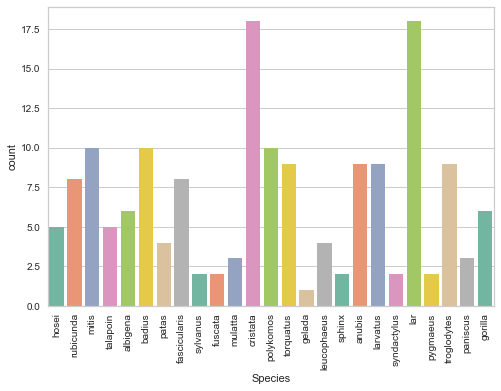

In [77]:
y = df['Species']
sns.countplot(x=y, label='Count', palette="Set2")
plt.xticks(rotation=90)
plt.show()

There are 25 different species in total and only species are important here. So, i'm dropping these four columns: Abbreviation, Genus, Sex, Age

In [78]:
# Separate labels and values
df_coordinates = df.drop(['Abbreviation', 'Genus', 'Species', 'Sex', 'Age'], axis=1)
df_species = df['Species']

In [79]:
df_coordinates

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.697783,-0.406979,0.607499,-1.309488,1.555190,-0.301822,-0.433051,0.037651,-0.279618,-0.421040
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,-0.105124,-0.569739,0.669346,-0.805954,1.583042,0.215340,-0.299550,0.709472,0.876382,-0.150133
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.546710,1.715016,1.269193,-0.397373,-0.813108,-0.481468,-0.243025,-0.537644,-0.140292,0.082158
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,-0.025537,0.972070,-0.066568,0.001964,0.656327,0.586941,-0.043639,-0.518699,-1.051100,0.542354
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.327166,-0.174675,0.368314,-0.700708,-0.450873,0.653851,0.718319,0.798722,-0.396749,0.844772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,1.064458,1.526719,-1.573739,-0.523507,0.069268,0.360452,0.513323,0.043604,0.294724,-0.003514
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-2.074445,-0.037273,-0.110737,0.018629,0.913451,-0.368755,-0.173323,-0.627292,0.092090,0.444992
162,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,2.706787,...,0.687204,1.546473,-2.072265,-0.240351,-0.184852,-0.033229,0.434486,-0.158110,-0.416191,0.160474
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,1.502094,1.749599,-0.235770,-0.484359,0.194612,0.125275,-0.018511,0.080169,-0.235063,0.317110


In [80]:
print("Shape after droping columns:", df_coordinates.shape)

Shape after droping columns: (165, 30)


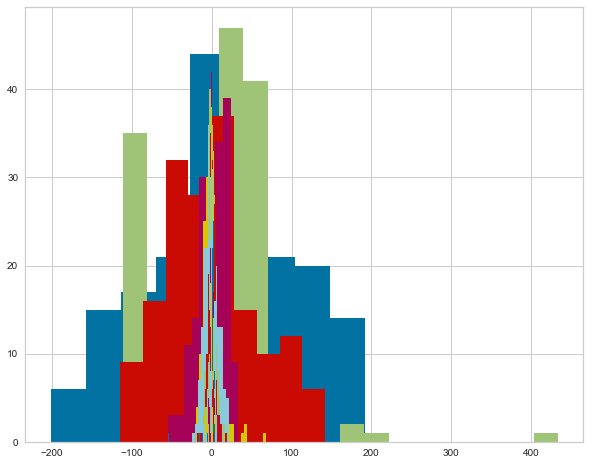

In [81]:
plt.subplots(figsize =(10, 8))
for col in df_coordinates.columns:
    plt.hist(df_coordinates[col], bins='auto')
plt.show()

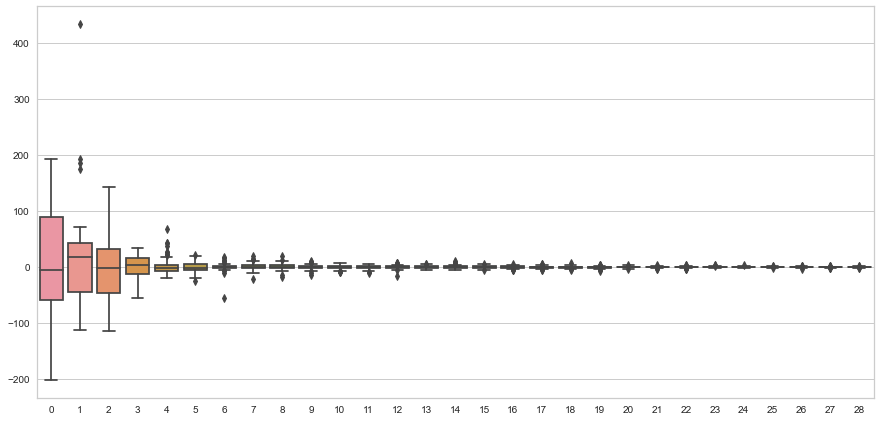

In [82]:
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = df_coordinates.iloc[:, 0:29], orient = 'v')

From avobe distribution plot and box plot we can see that there is outlier in this data.

In [83]:
corr_matrix = df_coordinates.corr(
    method = 'pearson',
    min_periods = 1  
)

corr_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,-0.041708,0.028695,-0.076057,0.013712,0.052373,0.016908,-0.046053,-0.037217,0.046748,...,-0.028925,0.030022,0.024708,-0.024955,0.002520,0.019881,-0.018560,0.057024,-0.025943,0.032286
1,-0.041708,1.000000,0.043172,-0.019783,0.008371,0.008966,-0.003308,-0.008855,-0.021718,0.012890,...,-0.005368,0.017089,-0.014384,0.001424,-0.012147,-0.012350,-0.004888,0.020379,-0.024367,-0.007079
2,0.028695,0.043172,1.000000,0.070564,-0.002763,0.002871,0.008408,-0.008806,0.090029,-0.030186,...,0.034596,-0.044028,0.031256,0.005013,-0.011213,0.048836,-0.000353,-0.022921,0.053242,0.035857
3,-0.076057,-0.019783,0.070564,1.000000,0.013192,0.027493,0.019275,-0.051065,-0.094024,0.023952,...,-0.051799,0.019674,-0.005013,-0.018987,-0.025383,-0.059759,0.001855,0.003891,0.005615,0.030173
4,0.013712,0.008371,-0.002763,0.013192,1.000000,-0.004260,-0.007232,0.025959,-0.002687,0.011894,...,0.018083,-0.010714,0.020395,0.015030,0.009955,0.014735,-0.003238,0.000607,-0.011486,-0.002767


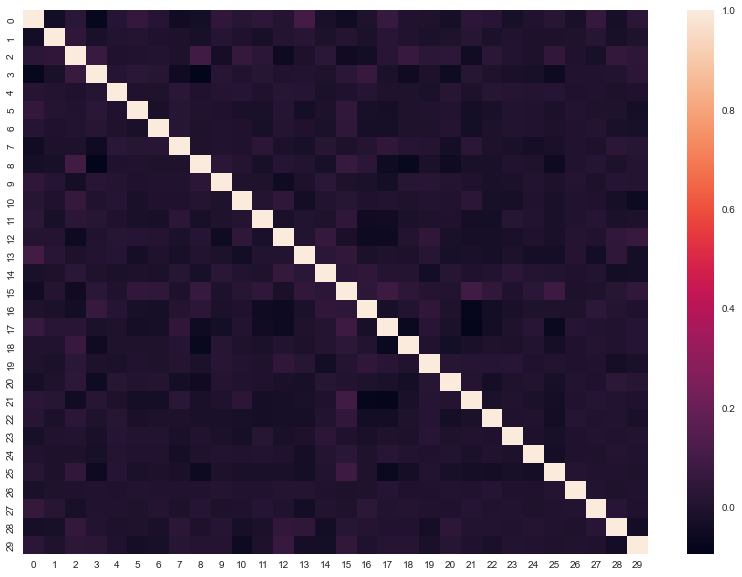

In [84]:
plt.subplots(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False)
plt.show()

The data seems to have almost no correlation, except the diagonal white line, which indicates the self-correlation.

In [85]:
def remove_outlier(df,columns,n_std):
    for col in columns:
        #print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

df_coordinates_clean = remove_outlier(df_coordinates,df_coordinates.columns, 2.5)

In [86]:
df_coordinates_clean

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.697783,-0.406979,0.607499,-1.309488,1.555190,-0.301822,-0.433051,0.037651,-0.279618,-0.421040
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,-0.105124,-0.569739,0.669346,-0.805954,1.583042,0.215340,-0.299550,0.709472,0.876382,-0.150133
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.546710,1.715016,1.269193,-0.397373,-0.813108,-0.481468,-0.243025,-0.537644,-0.140292,0.082158
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,-0.025537,0.972070,-0.066568,0.001964,0.656327,0.586941,-0.043639,-0.518699,-1.051100,0.542354
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.327166,-0.174675,0.368314,-0.700708,-0.450873,0.653851,0.718319,0.798722,-0.396749,0.844772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,-94.050832,-44.542377,91.023408,16.231518,1.952556,-7.227021,1.768435,-3.114095,-1.587100,-0.624771,...,1.775125,0.980304,-0.482541,-0.207674,0.278724,-0.178353,0.098691,-0.099439,-0.320591,0.272515
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,1.064458,1.526719,-1.573739,-0.523507,0.069268,0.360452,0.513323,0.043604,0.294724,-0.003514
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-2.074445,-0.037273,-0.110737,0.018629,0.913451,-0.368755,-0.173323,-0.627292,0.092090,0.444992
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,1.502094,1.749599,-0.235770,-0.484359,0.194612,0.125275,-0.018511,0.080169,-0.235063,0.317110


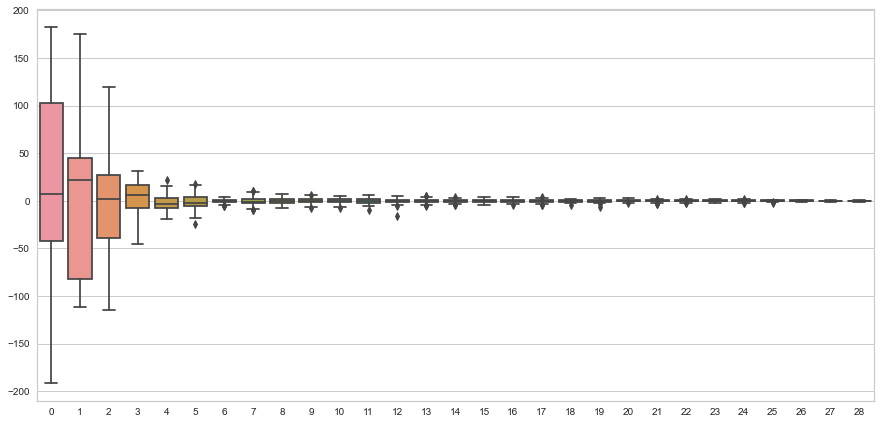

In [87]:
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = df_coordinates_clean.iloc[:, 0:29], orient = 'v')

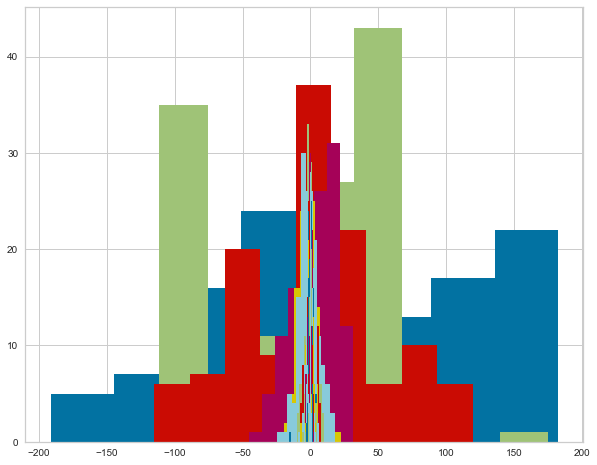

In [88]:
plt.subplots(figsize =(10, 8))
for col in df_coordinates_clean.columns:
    plt.hist(df_coordinates_clean[col], bins='auto')
plt.show()

After removing outliers we can see that there is no outliers present in dataset.

In [89]:
df_coordinates_clean.shape

(123, 30)

In [90]:
df_new = pd.concat([df_coordinates_clean, df_species], axis=1, join='inner')
display(df_new)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Species
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.406979,0.607499,-1.309488,1.555190,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,hosei
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,-0.569739,0.669346,-0.805954,1.583042,0.215340,-0.299550,0.709472,0.876382,-0.150133,hosei
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,1.715016,1.269193,-0.397373,-0.813108,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,rubicunda
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,0.972070,-0.066568,0.001964,0.656327,0.586941,-0.043639,-0.518699,-1.051100,0.542354,rubicunda
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,-0.174675,0.368314,-0.700708,-0.450873,0.653851,0.718319,0.798722,-0.396749,0.844772,rubicunda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,-94.050832,-44.542377,91.023408,16.231518,1.952556,-7.227021,1.768435,-3.114095,-1.587100,-0.624771,...,0.980304,-0.482541,-0.207674,0.278724,-0.178353,0.098691,-0.099439,-0.320591,0.272515,lar
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,1.526719,-1.573739,-0.523507,0.069268,0.360452,0.513323,0.043604,0.294724,-0.003514,lar
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-0.037273,-0.110737,0.018629,0.913451,-0.368755,-0.173323,-0.627292,0.092090,0.444992,lar
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,1.749599,-0.235770,-0.484359,0.194612,0.125275,-0.018511,0.080169,-0.235063,0.317110,lar


In [91]:
df_new.shape

(123, 31)

After removing outliers we can see that shape of data has changed 165 to 123.

In [92]:
print(len(df_new['Species'].value_counts()))
df_new['Species'].value_counts()

23


cristata        16
lar             15
mitis           10
polykomos       10
larvatus         9
badius           8
rubicunda        6
torquatus        6
troglodytes      5
hosei            5
fascicularis     5
albigena         5
talapoin         5
mulatta          3
anubis           3
gorilla          3
fuscata          2
patas            2
sylvanus         1
gelada           1
sphinx           1
syndactylus      1
paniscus         1
Name: Species, dtype: int64

After removing outliers number of species count has decreased to 23 from 25. Also we can see that there are few species where number of counts is very small, which might not be helpful for clustering. Therefore i will keep only those species whose count is 5 or higher.

In [93]:
counts = pd.DataFrame(df_new['Species'].value_counts()).reset_index()
counts


,index,Species
0,cristata,16
1,lar,15
2,mitis,10
3,polykomos,10
4,larvatus,9
5,badius,8
6,rubicunda,6
7,torquatus,6
8,troglodytes,5
9,hosei,5


In [94]:
less_counts = counts[counts['Species']<3]['index'].tolist()
less_counts


['fuscata', 'patas', 'sylvanus', 'gelada', 'sphinx', 'syndactylus', 'paniscus']

In [95]:
df_new = df_new[~df_new['Species'].isin(less_counts)]

In [96]:
df_new.shape

(114, 31)

In [97]:
print(df_new)

              0           1          2          3          4          5  \
0    133.426742 -101.627603  21.125902 -11.518251   4.621089  -1.519551   
1    145.344740 -108.229812  21.121390 -14.982879   2.299335  -2.354040   
2    137.773342 -107.162743  18.232497 -17.116294   3.016809  -5.295234   
3    141.523739 -107.436626  17.448083 -16.861469   3.382894  -1.071286   
4    142.357906  -97.195294  10.511391  -6.520641   3.555506   1.652390   
..          ...         ...        ...        ...        ...        ...   
159  -94.050832  -44.542377  91.023408  16.231518   1.952556  -7.227021   
160  -91.085462  -46.160638  86.488654  16.969797   8.581993  -8.889106   
161  -91.489354  -39.614165  87.430951  20.871706  11.444575  -6.707486   
163  -90.248202  -50.111180  77.285086  19.578454   5.634918 -13.863556   
164  -88.663448  -43.835382  74.681197  19.086880   9.755993  -9.499983   

            6         7         8         9  ...        21        22  \
0    0.583410 -7.182875  1.

In [98]:
print('The dimension of the DataFrame is: ', df_new.ndim)

The dimension of the DataFrame is:  2


In [99]:
skew_columns = (df_new.skew().sort_values(ascending=False))
print('skew')
print(skew_columns.head(10))
print('\n')

skew_columns_75 = skew_columns.loc[skew_columns > 0.75]
print('skew > 0.75')
print(skew_columns_75)
print('\n')

skew
4     0.333739
28    0.213668
7     0.182299
26    0.141199
8     0.134656
2     0.090372
5     0.061074
23    0.043115
9     0.033813
27    0.032512
dtype: float64


skew > 0.75
Series([], dtype: float64)




In [100]:
# Scaling the dataset
data = pd.DataFrame(df_new.iloc[:,:30])
data.columns = list(df_new.iloc[:,:30].columns)

data['Species'] = df_new['Species']

# Creating the high dimensional feature space X
data_drop = data.drop('Species',axis=1)
X = data_drop.values
X

array([[ 1.33426742e+02, -1.01627603e+02,  2.11259023e+01, ...,
         3.76507541e-02, -2.79617731e-01, -4.21039717e-01],
       [ 1.45344740e+02, -1.08229812e+02,  2.11213897e+01, ...,
         7.09471824e-01,  8.76381939e-01, -1.50132702e-01],
       [ 1.37773342e+02, -1.07162743e+02,  1.82324974e+01, ...,
        -5.37644241e-01, -1.40291682e-01,  8.21576815e-02],
       ...,
       [-9.14893542e+01, -3.96141648e+01,  8.74309513e+01, ...,
        -6.27291843e-01,  9.20901036e-02,  4.44992310e-01],
       [-9.02482021e+01, -5.01111800e+01,  7.72850865e+01, ...,
         8.01685840e-02, -2.35063369e-01,  3.17109973e-01],
       [-8.86634478e+01, -4.38353821e+01,  7.46811974e+01, ...,
         6.08619784e-02, -2.97478831e-01,  7.23834817e-01]])

In [101]:
print('The dimension of the DataFrame is: ', X.ndim)

The dimension of the DataFrame is:  2


In [102]:
y = data['Species']

In [103]:
y

0          hosei
1          hosei
2      rubicunda
3      rubicunda
4      rubicunda
         ...    
159          lar
160          lar
161          lar
163          lar
164          lar
Name: Species, Length: 114, dtype: object

## KMeans Clustering

Clustering is an unsupervised machine learning method that can identify groups of similar data points, known as clusters, from the data itself. For some clustering algorithms, such as K-means, one needs to know how many clusters there are beforehand. Unfortunately in many instances we do not know how many clusters there are in our data. There are three approaches to find the optimal number of clusters:

- The elbow method<br>
- The optimization of the silhouette coefficient<br>
- The gap statistic<br>

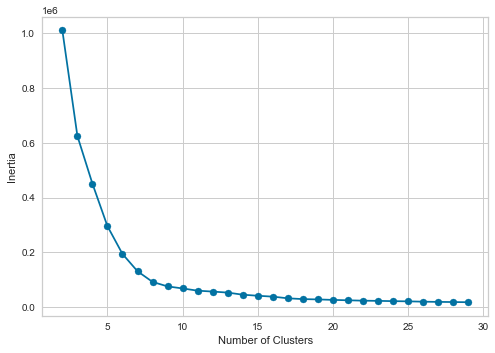

In [104]:
inertia = []
list_num_clusters = list(range(2,30))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

From avobe plot there is no visible elbow point to identify k value, for these reason I tried KElbowVisualizer and silhouette_score to identify optimal K value.

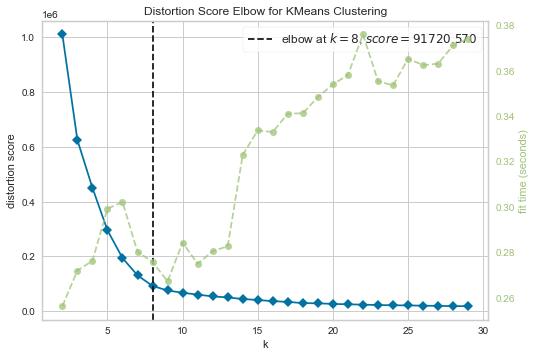

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

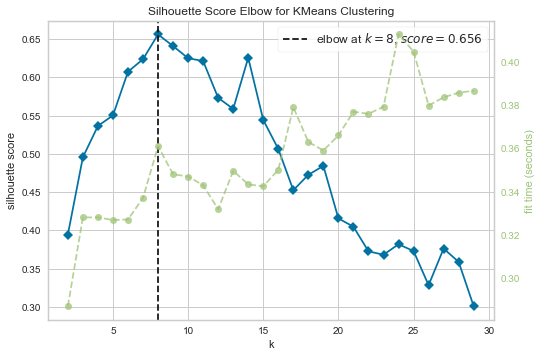

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [106]:
# Silhouette Score for K means
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### Silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.3945309417752449
For n_clusters = 3 The average silhouette_score is : 0.49565624381550455
For n_clusters = 4 The average silhouette_score is : 0.537886677944842
For n_clusters = 5 The average silhouette_score is : 0.5503291155378223
For n_clusters = 6 The average silhouette_score is : 0.6073979190995507
For n_clusters = 7 The average silhouette_score is : 0.6202793146530204
For n_clusters = 8 The average silhouette_score is : 0.6561746208218413
For n_clusters = 9 The average silhouette_score is : 0.6408925668228544
For n_clusters = 10 The average silhouette_score is : 0.6250777099150268
For n_clusters = 11 The average silhouette_score is : 0.5644736679691046
For n_clusters = 12 The average silhouette_score is : 0.571587298751984
For n_clusters = 13 The average silhouette_score is : 0.5007154160771212
For n_clusters = 14 The average silhouette_score is : 0.5616516979375136


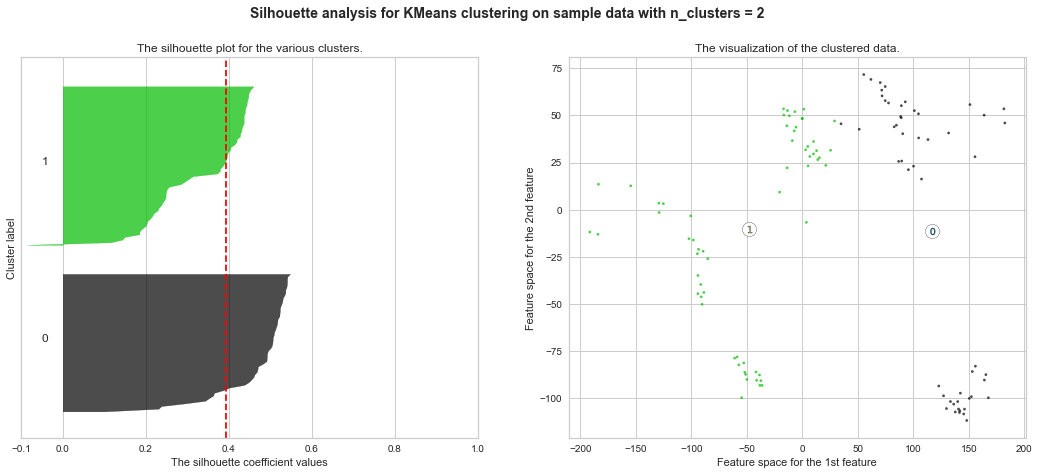

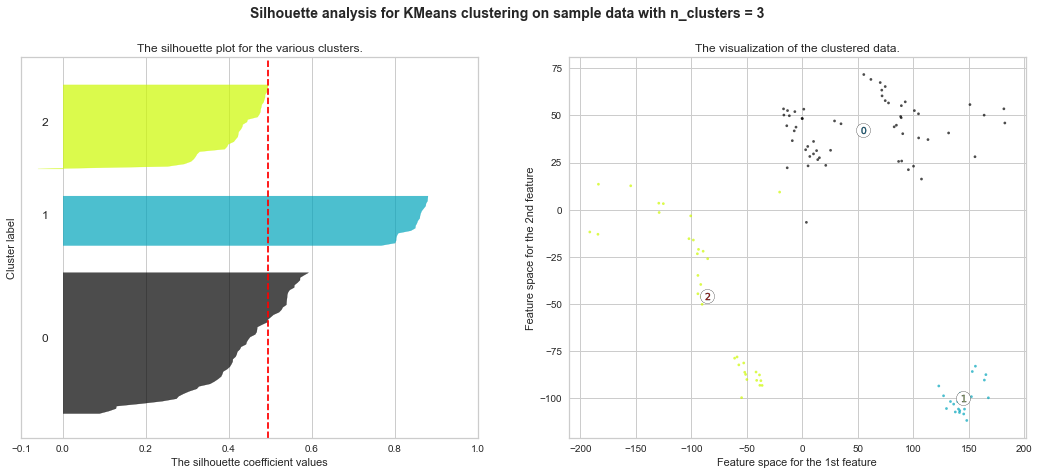

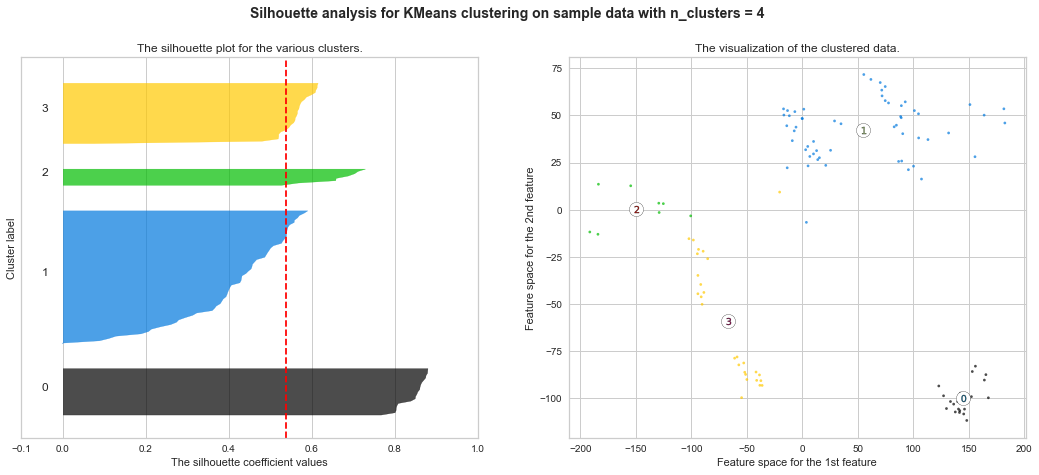

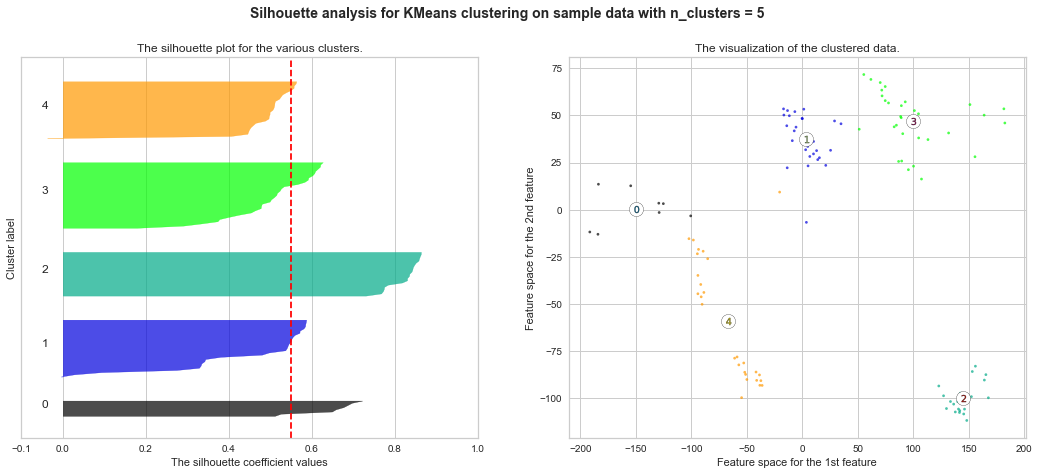

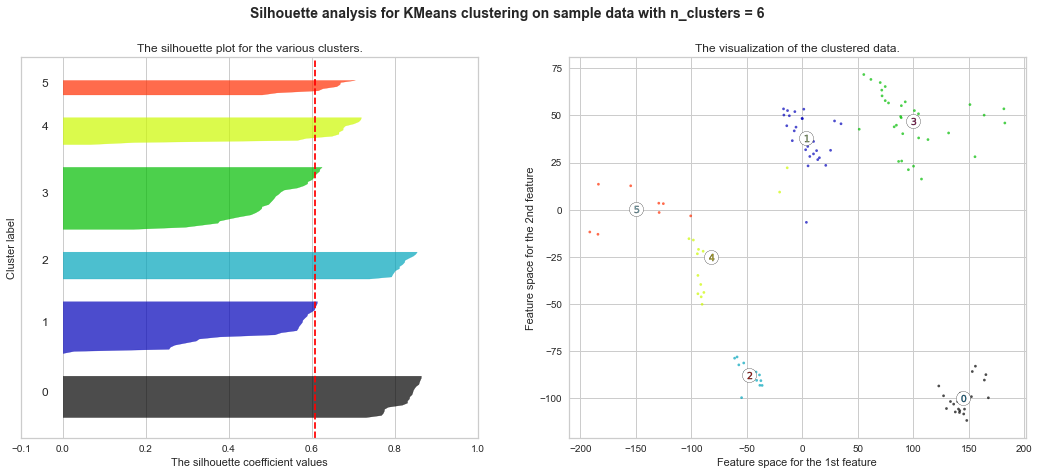

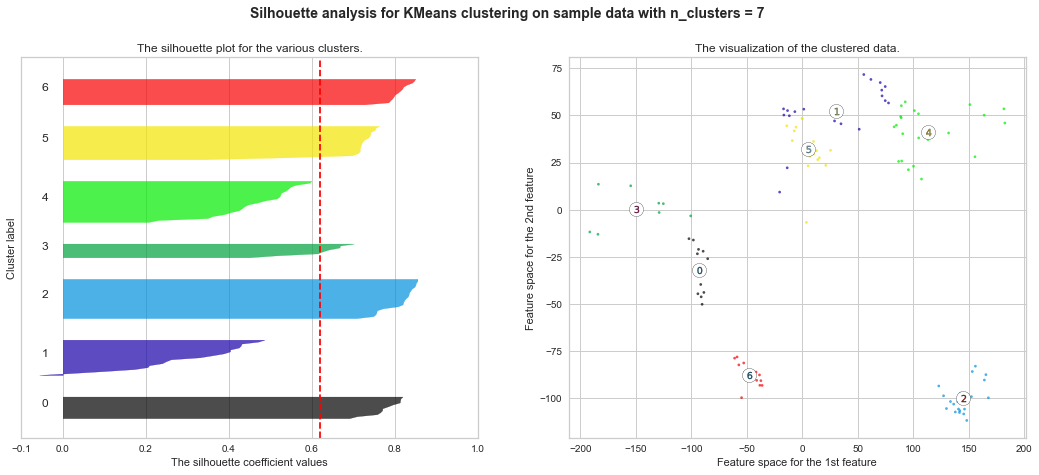

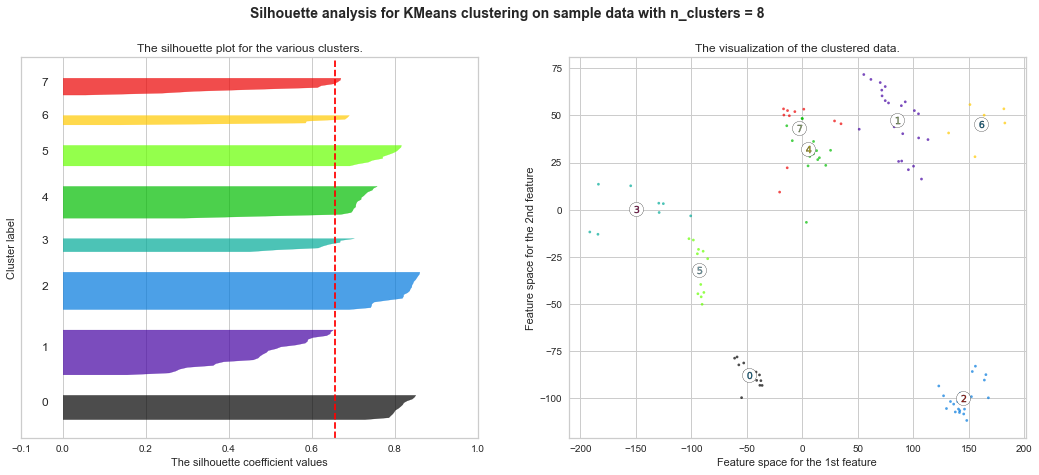

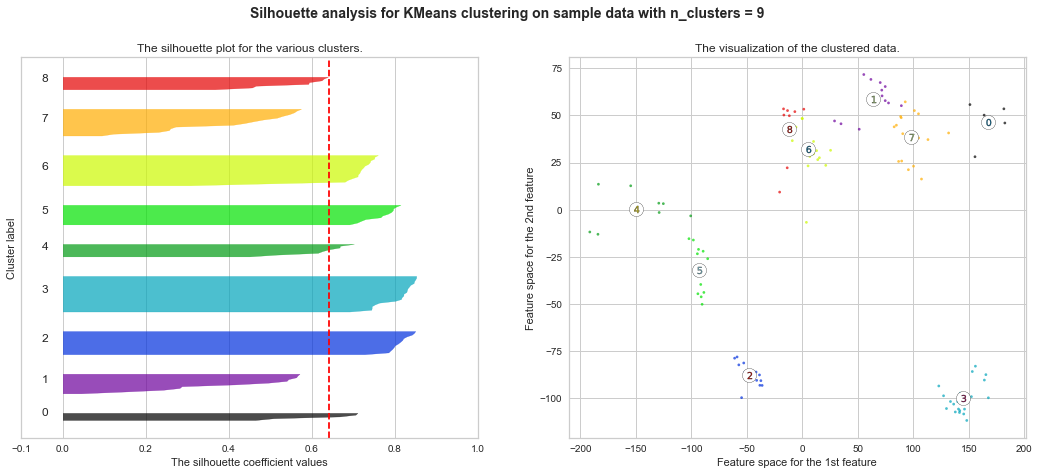

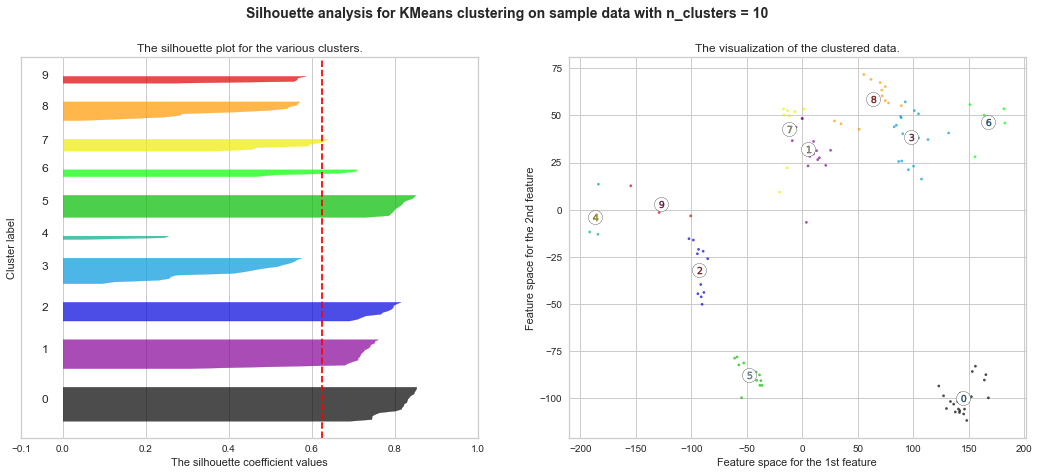

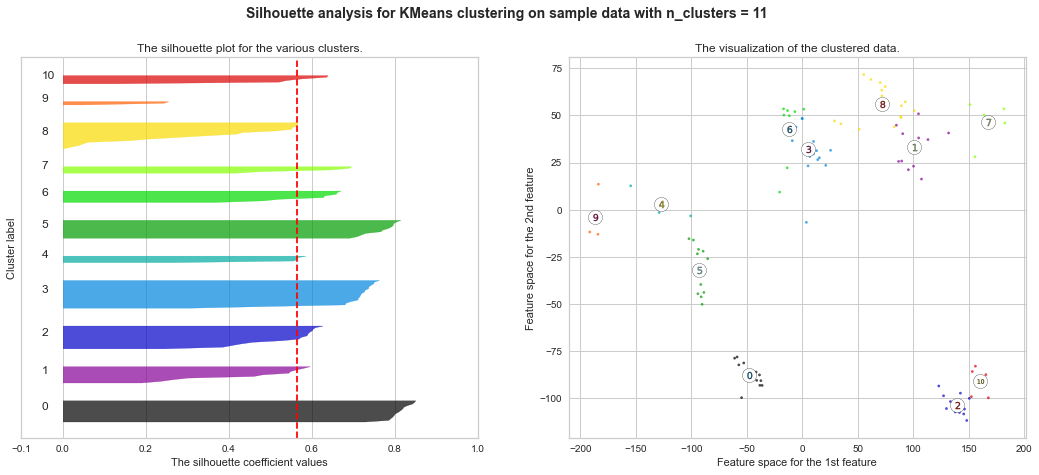

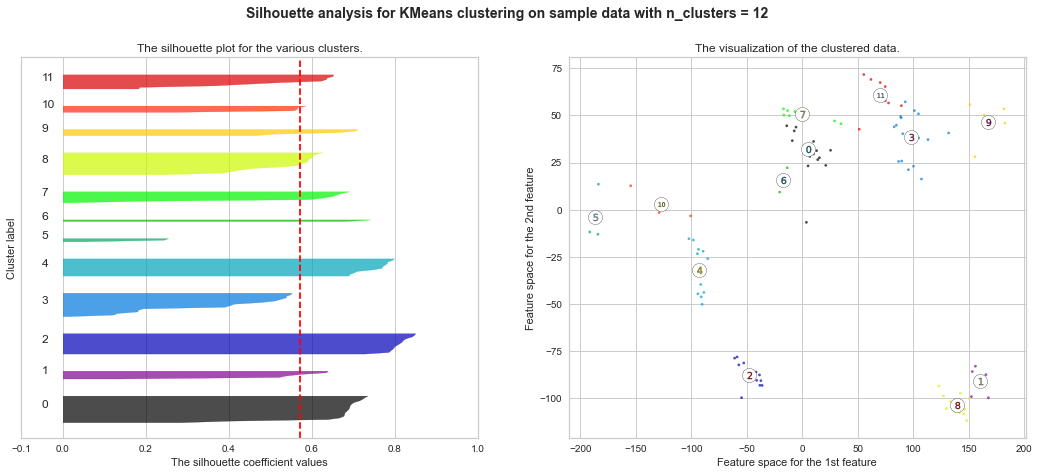

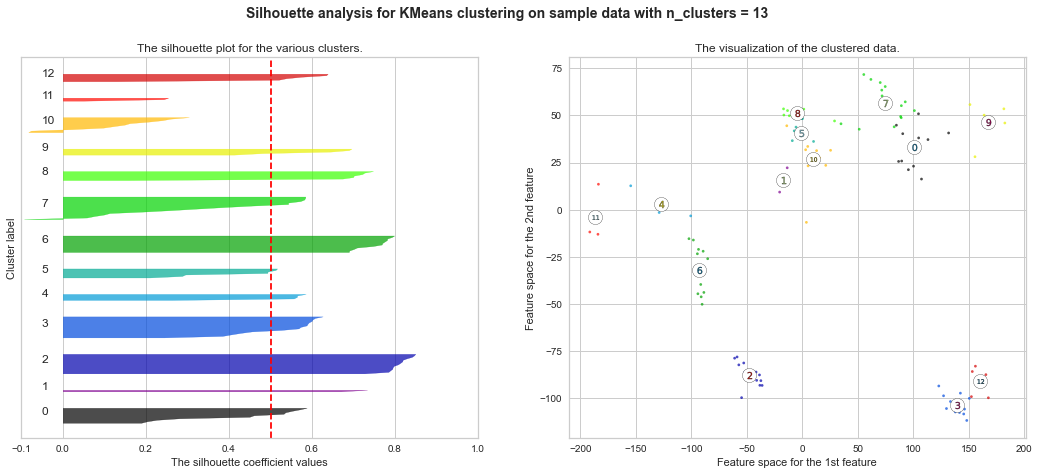

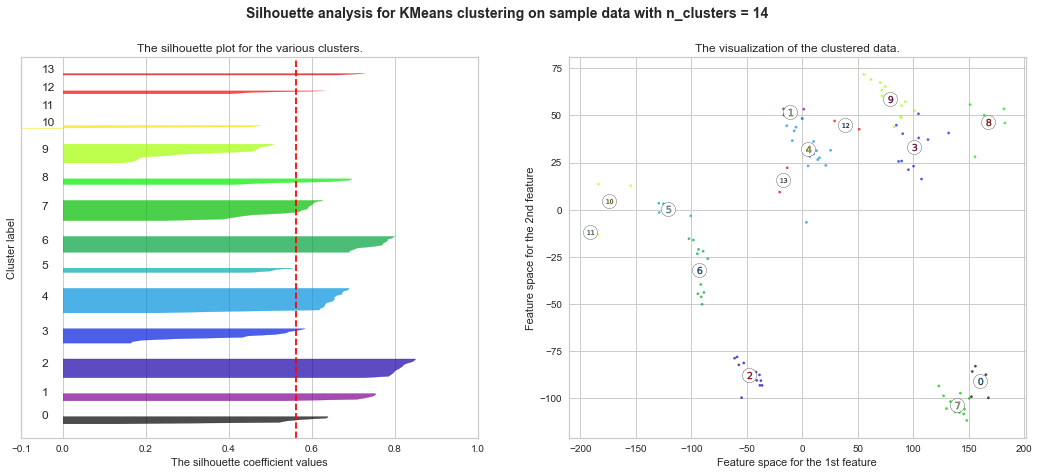

In [107]:

range_n_clusters = list(range(2,15))
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Based on Elbow method and Silhouette Score I'm choosing 8 for number of cluster to implement KMeans clustering.

In [108]:
# K-means clusterin with 8 cluster
num_clusters = 8
km = KMeans(n_clusters=num_clusters).fit(X)
km_labels = km.fit_predict(X)
km_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7,
       7, 2, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7,
       7, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [109]:
df_new['cluster'] = km_labels
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,Species,cluster
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,0.607499,-1.309488,1.555190,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,hosei,2
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,0.669346,-0.805954,1.583042,0.215340,-0.299550,0.709472,0.876382,-0.150133,hosei,2
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,1.269193,-0.397373,-0.813108,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,rubicunda,2
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,-0.066568,0.001964,0.656327,0.586941,-0.043639,-0.518699,-1.051100,0.542354,rubicunda,2
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.368314,-0.700708,-0.450873,0.653851,0.718319,0.798722,-0.396749,0.844772,rubicunda,2


In [110]:
df_new.cluster.unique()

array([2, 7, 0, 4, 1, 6, 5, 3])

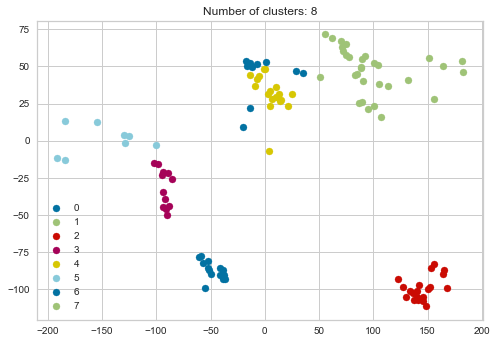

In [111]:
for i in np.unique(df_new['cluster']):
    plt.scatter(X[df_new['cluster'] == i , 0] , X[df_new['cluster'] == i , 1] , label = i)
plt.legend()
plt.title("Number of clusters: %d" % len(np.unique(df_new['cluster'])))
plt.show()

In [112]:
fig = plt.figure(figsize = (15,15))
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = km_labels, size= 5, line=dict(color= 'black',width = 3)))
layout = go.Layout(margin=dict(l=0,r=0),height = 500,width = 500)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

<Figure size 1080x1080 with 0 Axes>

In [113]:
print("Adjusted Random Score: %0.3f" % metrics.adjusted_rand_score(km_labels, df_new['Species']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(km_labels, df_new['Species']))
print("Completeness: %0.3f" % metrics.completeness_score(km_labels, df_new['Species']))


Adjusted Random Score: 0.391
Homogeneity: 0.820
Completeness: 0.617


## DBScan

DBSCAN is a popular density-based data clustering algorithm. To cluster data points, this algorithm separates the high-density regions of the data from the low-density areas. Unlike the K-Means algorithm, the best thing with this algorithm is that we don’t need to provide the number of clusters required prior.

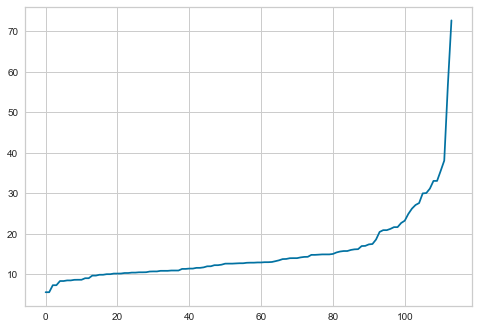

In [114]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


From the above plot, we note the maximum curvature of the curve is about 40, and thus I picked Eps as 40.

number of actual clusters without noise :  8
number of noise :  2


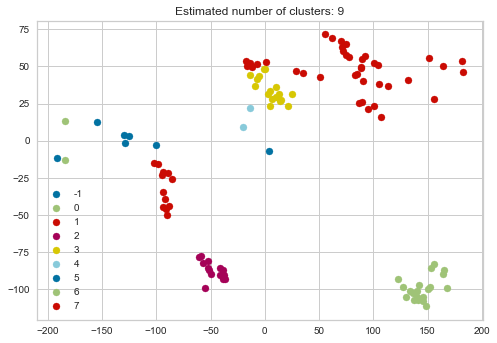

In [115]:
# DBsacn
db = DBSCAN(eps=40, min_samples=2).fit(X)
db_labels = db.fit_predict(X)
n_clusters_=len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print('number of actual clusters without noise : ',n_clusters_)
print('number of noise : ', list(db.labels_).count(-1))
# Plot the clusters
for i in np.unique(db_labels):
    plt.scatter(X[db_labels == i , 0] , X[db_labels== i , 1], label = i)
plt.legend()
plt.title("Estimated number of clusters: %d" % len(np.unique(db_labels)))
plt.show() # showing the plot

The result of Dbscan shows 8 clusters and 2 points of noise. 

In [116]:
fig = plt.figure(figsize = (15,15))
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = db_labels, size= 5, line=dict(color= 'black',width = 3)))
layout = go.Layout(margin=dict(l=0,r=0),height = 500,width = 500)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

<Figure size 1080x1080 with 0 Axes>

From avobe 3D plot we can observe that data are well clustered but there are few points which are not in a cluster, also are not associated with any dense clusters.

In [117]:
print("Adjusted Random Score: %0.3f" % metrics.adjusted_rand_score(db_labels, df_new['Species']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(db_labels, df_new['Species']))
print("Completeness: %0.3f" % metrics.completeness_score(db_labels, df_new['Species']))


Adjusted Random Score: 0.311
Homogeneity: 0.832
Completeness: 0.570


### Agglomerative Single-Link Clustering Algorithm

In [118]:
# The function for plotting the denogram.


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [119]:
# Implementing Aglomerative single-link algorithm

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage = 'single').fit(X)

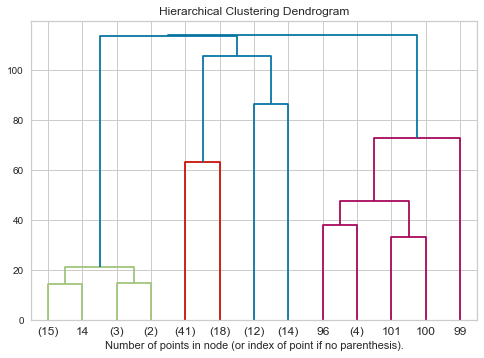

In [120]:
# Plot the algorithm 
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


# With the drenogram we can analyze the optimal number of clusters.

In [121]:
# After analyzing the number of clusters required, we can rerun the algorithm specifying this parameter.

clustering = AgglomerativeClustering(n_clusters=5, linkage = 'single').fit(X)

df_species = df_new['Species'].to_numpy()

labels_true = df_species
labels = clustering.labels_

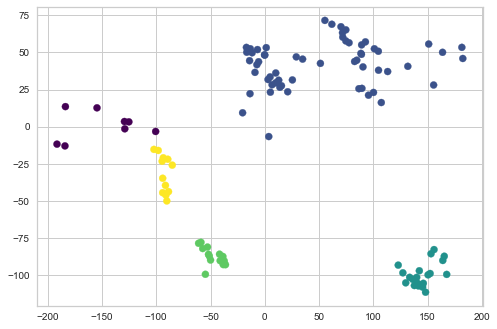

In [122]:
# Plot the results 

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

In [123]:
print('Agglomerative Single-Link Clustering: %0.3f' % metrics.adjusted_rand_score( clustering.labels_, df_new['Species']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(clustering.labels_, df_new['Species']))
print("Completeness: %0.3f" % metrics.completeness_score(clustering.labels_, df_new['Species']))

Agglomerative Single-Link Clustering: 0.160
Homogeneity: 0.798
Completeness: 0.403


### MeanShift

Choosing the correct bandwidth by hand might work for small data-sets but will be pretty hard as the data-set gets bigger and bigger. Therefore instead of selecting the bandwidth by hand, I'm using Scikit-Learn estimate_bandwidth wihich will automatically detect bandwidth.

In [124]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=80)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
cluster_centers = ms.cluster_centers_

labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


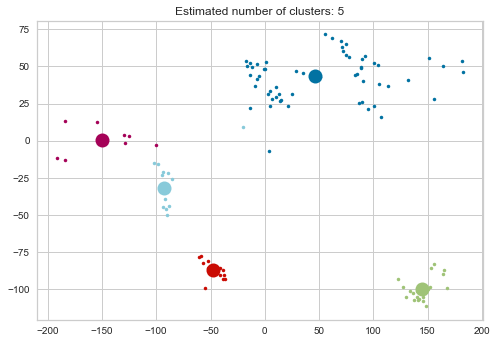

In [125]:
# Plot result
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [126]:
fig = plt.figure(figsize = (15,15))
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = ms.labels_, size= 5, line=dict(color= 'black',width = 3)))
layout = go.Layout(margin=dict(l=0,r=0),height = 500,width = 500)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

<Figure size 1080x1080 with 0 Axes>

In [127]:
print('------------------Mean-Shift--------------------------')
print('Agglomerative Single-Link Clustering: %0.3f' % metrics.adjusted_rand_score( ms.labels_, df_new['Species']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(ms.labels_, df_new['Species']))
print("Completeness: %0.3f" % metrics.completeness_score(ms.labels_, df_new['Species']))

------------------Mean-Shift--------------------------
Agglomerative Single-Link Clustering: 0.165
Homogeneity: 0.788
Completeness: 0.402


In [131]:
print('------------------Agglomerative Single-Link Clustering Algorithm--------------------------')

print('Agglomerative Single-Link Clustering: %0.3f' % metrics.adjusted_rand_score( clustering.labels_, df_new['Species']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(clustering.labels_, df_new['Species']))
print("Completeness: %0.3f" % metrics.completeness_score(clustering.labels_, df_new['Species']))

------------------Agglomerative Single-Link Clustering Algorithm--------------------------
Agglomerative Single-Link Clustering: 0.160
Homogeneity: 0.798
Completeness: 0.403


In [129]:
print('------------------KMeans--------------------------')
print("Adjusted Random Score: %0.3f" % metrics.adjusted_rand_score(km_labels, df_new['Species']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(km_labels, df_new['Species']))
print("Completeness: %0.3f" % metrics.completeness_score(km_labels, df_new['Species']))

------------------KMeans--------------------------
Adjusted Random Score: 0.391
Homogeneity: 0.820
Completeness: 0.617


In [130]:
print('------------------DBScan--------------------------')
print("Adjusted Random Score: %0.3f" % metrics.adjusted_rand_score(db_labels, df_new['Species']))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(db_labels, df_new['Species']))
print("Completeness: %0.3f" % metrics.completeness_score(db_labels, df_new['Species']))

------------------DBScan--------------------------
Adjusted Random Score: 0.311
Homogeneity: 0.832
Completeness: 0.570


From sklearn.metrics.cluster module I use Adjusted Random Score, Homogeneity and Completeness metrics to evaluate the performance of KMeans, DBScan, Agglomerative Single-Link Clustering Algorithm and Mean-Shift clustering methods. From these score we can see that for Primates Morphology data KMeans clustering algorithm performs better.